In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../data/processed/train_FD001_features.csv')
df.head()

,unit_number,time_cycles,sensor_4_mean_5,sensor_11_mean_5,sensor_21_mean_5,sensor_15_mean_5,sensor_20_mean_5,sensor_17_mean_5,sensor_12_mean_5,sensor_7_mean_5,...,sensor_13_mean_5,sensor_3,sensor_8,sensor_13,sensor_9_mean_5,sensor_9,sensor_14_mean_5,sensor_14,sensor_14_std_5,RUL
0,1,1,1400.600000,47.470,23.419000,8.419500,39.060000,392.000000,521.660,554.360000,...,2388.020,1589.70,2388.06,2388.02,9046.190000,9046.19,8138.620000,8138.62,0.000000,191
1,1,2,1401.870000,47.480,23.421300,8.425650,39.030000,392.000000,521.970,554.055000,...,2388.045,1591.82,2388.04,2388.07,9045.130000,9044.07,8135.055000,8131.49,5.041671,190
2,1,3,1402.646667,47.410,23.395600,8.423033,39.003333,391.333333,522.120,554.123333,...,2388.040,1587.99,2388.08,2388.03,9047.733333,9052.94,8134.446667,8133.23,3.717450,189
3,1,4,1402.452500,47.340,23.390175,8.409325,38.972500,391.500000,522.305,554.205000,...,2388.050,1582.79,2388.11,2388.08,9048.170000,9049.48,8134.292500,8133.83,3.050906,188
4,1,5,1403.206000,47.328,23.393020,8.413340,38.958000,391.800000,522.282,554.164000,...,2388.048,1582.85,2388.06,2388.04,9049.566000,9055.15,8134.194000,8133.80,2.651326,187


In [7]:
units = df['unit_number'].unique()

train_units, test_units = train_test_split(units, test_size=0.2, random_state=42)

train_df = df[df['unit_number'].isin(train_units)]
test_df  = df[df['unit_number'].isin(test_units)]

In [8]:
X_train = train_df.drop(columns=['unit_number','time_cycles','RUL'])
y_train = train_df['RUL']

X_test = test_df.drop(columns=['unit_number','time_cycles','RUL'])
y_test = test_df['RUL']

print(X_train.shape, X_test.shape)

(16561, 29) (4070, 29)


Baseline metrics
RMSE: 65.71544508456086
MAE: 55.363284140368854
R2: -0.0019365813893532646


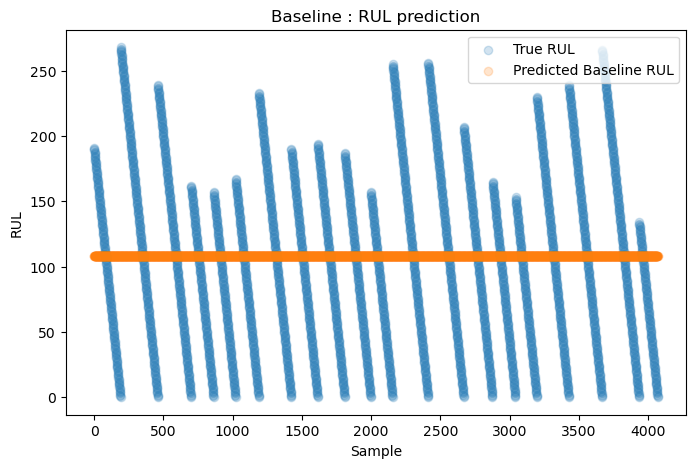

In [22]:
# Baseline

y_baseline_pred = np.full_like(y_test, fill_value=y_train.mean(), dtype=float)

rmse_baseline = np.sqrt(mean_squared_error(y_test, y_baseline_pred))
mae_baseline = mean_absolute_error(y_test, y_baseline_pred)
r2_baseline = r2_score(y_test, y_baseline_pred)

print("Baseline metrics")
print("RMSE:", rmse_baseline)
print("MAE:", mae_baseline)
print("R2:", r2_baseline)

plt.figure(figsize=(8,5))
plt.scatter(range(len(y_test)), y_test, label='True RUL', alpha=0.2)
plt.scatter(range(len(y_test)), y_baseline_pred, label='Predicted Baseline RUL', alpha=0.2)
plt.title('Baseline : RUL prediction')
plt.xlabel('Sample')
plt.ylabel('RUL')
plt.legend()
plt.show()
plt.close()

Linear Regression Metrics
RMSE: 37.51751617540759
MAE: 29.49305907891982
R2: 0.6734321080307423


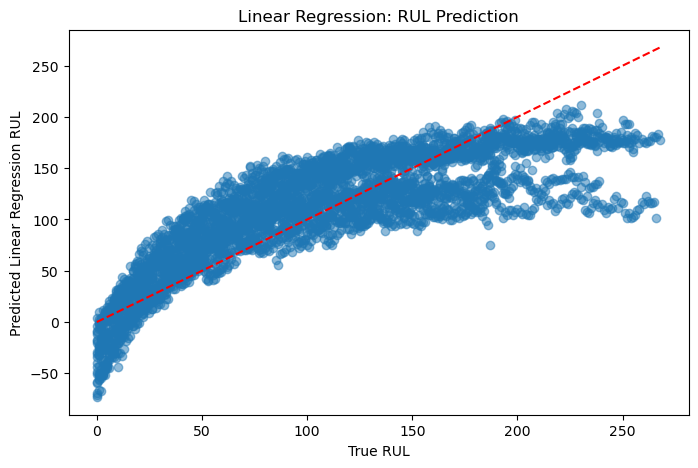

In [23]:
# Linear regression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_lr_pred = lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_lr_pred))
mae_lr = mean_absolute_error(y_test, y_lr_pred)
r2_lr = r2_score(y_test, y_lr_pred)

print("Linear Regression Metrics")
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("R2:", r2_lr)

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_lr_pred, alpha=0.5)
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--')
plt.xlabel('True RUL')
plt.ylabel('Predicted Linear Regression RUL')
plt.title('Linear Regression: RUL Prediction')
plt.show()
plt.close()